### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 19,219094,8959,84879
Mar 20,236216,9396,86300
Mar 21,284217,11822,92971
Mar 22,317093,13664,95806
Mar 23,351377,15340,100524


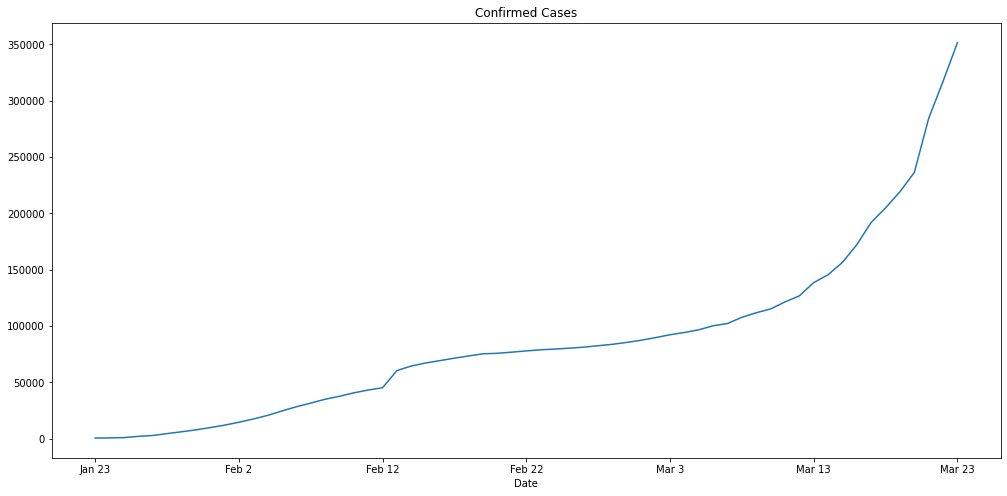

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

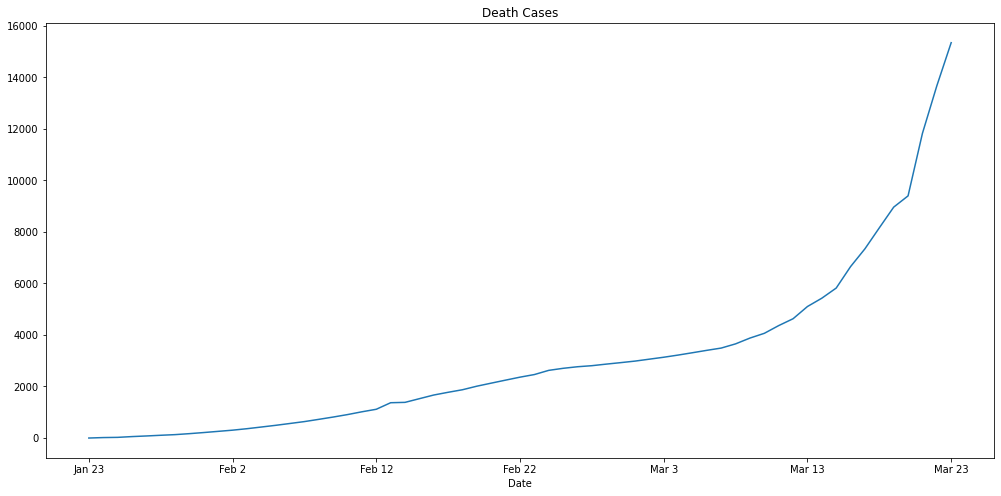

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

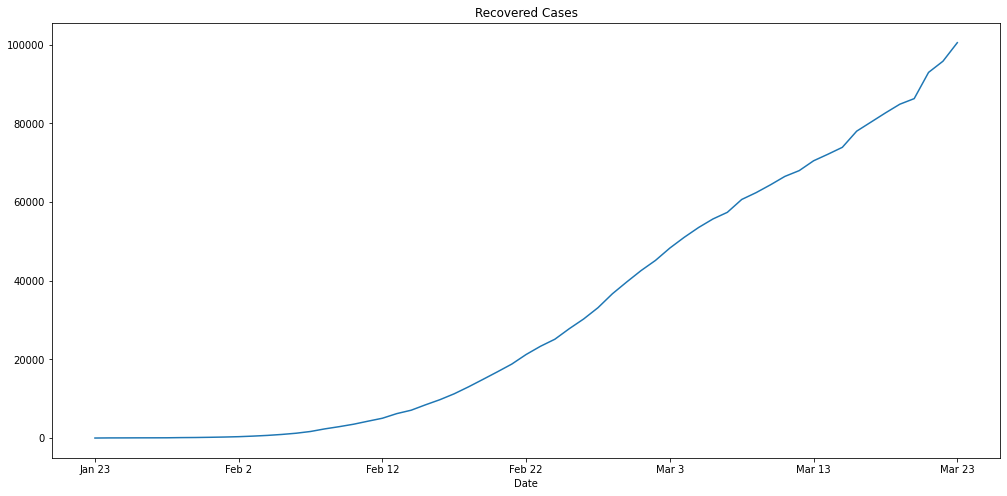

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

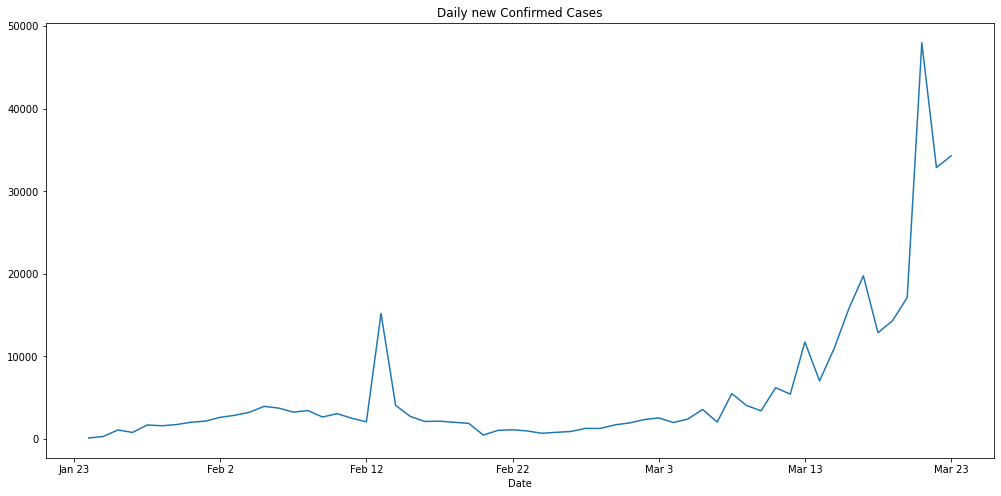

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

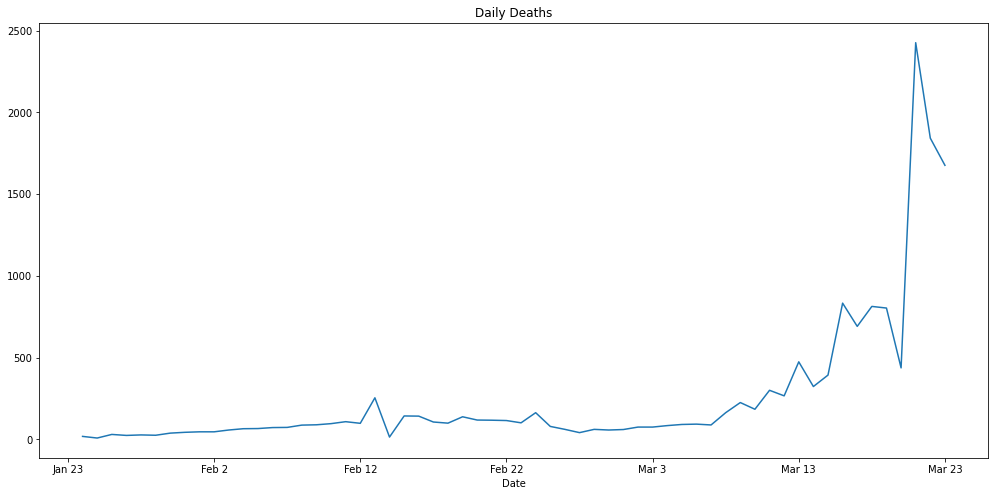

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

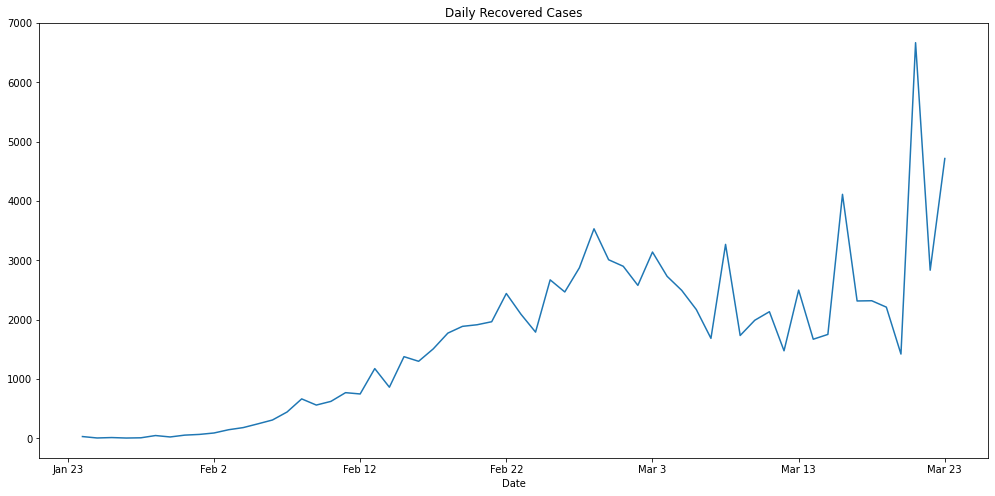

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=1183.841, BIC=1187.996, Fit time=0.032 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1177.200, BIC=1183.432, Fit time=0.213 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1174.338, BIC=1180.570, Fit time=0.788 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1176.332, BIC=1184.642, Fit time=1.274 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1176.331, BIC=1184.642, Fit time=0.270 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.809 seconds


In [15]:
confirmed_model.aic()

1174.337670412942

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-24 - 386119
2020-03-25 - 421442
2020-03-26 - 457345
2020-03-27 - 493829
2020-03-28 - 530894


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=839.179, BIC=843.334, Fit time=0.015 seconds
Fit ARIMA: order=(1, 2, 0); AIC=830.006, BIC=836.239, Fit time=0.235 seconds
Fit ARIMA: order=(0, 2, 1); AIC=826.427, BIC=832.659, Fit time=0.286 seconds
Fit ARIMA: order=(1, 2, 1); AIC=828.230, BIC=836.540, Fit time=0.437 seconds
Fit ARIMA: order=(0, 2, 2); AIC=828.080, BIC=836.390, Fit time=0.266 seconds
Fit ARIMA: order=(1, 2, 2); AIC=819.557, BIC=829.944, Fit time=1.062 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.457 seconds


In [20]:
deaths_model.aic()

819.5565642653651

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-24 - 17463
2020-03-25 - 19984
2020-03-26 - 22873
2020-03-27 - 26103
2020-03-28 - 29650


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=993.125, BIC=997.280, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=963.182, BIC=969.415, Fit time=0.294 seconds
Fit ARIMA: order=(0, 2, 1); AIC=959.697, BIC=965.930, Fit time=0.291 seconds
Fit ARIMA: order=(1, 2, 1); AIC=956.457, BIC=964.767, Fit time=0.491 seconds
Fit ARIMA: order=(1, 2, 2); AIC=955.962, BIC=966.349, Fit time=1.087 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=956.403, BIC=964.713, Fit time=0.494 seconds
Fit ARIMA: order=(1, 2, 3); AIC=957.464, BIC=969.930, Fit time=1.140 seconds
Total fit time: 4.185 seconds


In [25]:
recovered_model.aic()

955.9617345284338

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-24 - 104400
2020-03-25 - 108734
2020-03-26 - 113407
2020-03-27 - 118340
2020-03-28 - 123475
